# **Data Loading**

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
df=pd.read_csv("ifood_df.csv")
df.head()

# **Data Exploration and Cleaning**

In [ ]:
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)


Missing Values:
 Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds      

# **Handling Missing Values and Accessing Values**

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)
df_cleaned = df.copy()
df_cleaned.loc[:, df_cleaned.select_dtypes(include=['number']).columns] = df_cleaned.select_dtypes(include=['number']).fillna(df_cleaned.median(numeric_only=True))
df_cleaned.loc[:, df_cleaned.select_dtypes(include=['object']).columns] = df_cleaned.select_dtypes(include=['object']).fillna(df_cleaned.mode().iloc[0])
print("\nMissing Values After Cleaning:\n", df_cleaned.isnull().sum())
numerical_features = df_cleaned.select_dtypes(include=['number']).columns
print("Selected Features for Clustering:\n", numerical_features)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned[numerical_features])
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features)
df_scaled.head()



Missing Values After Cleaning:
 Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRe

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,0.311511,-0.827038,-0.932982,0.315068,0.973297,1.549924,1.728456,2.448975,1.461111,0.853147,...,-0.580207,-0.189418,-0.315539,-0.157632,0.995557,-0.445752,-0.526780,1.673874,1.660714,-0.444176
1,-0.258030,1.038412,0.897655,-0.375927,-0.875480,-0.637837,-0.728158,-0.648771,-0.631988,-0.733988,...,-0.580207,-0.189418,-0.315539,-0.157632,0.995557,-0.445752,-0.526780,-0.941308,-0.910228,-0.444176
2,0.962228,-0.827038,-0.932982,-0.790525,0.354075,0.569203,-0.177695,1.337431,-0.150816,-0.037197,...,1.723523,-0.189418,-0.315539,-0.157632,0.995557,-0.445752,-0.526780,0.295180,0.310339,-0.444176
3,-1.209260,1.038412,-0.932982,-0.790525,-0.875480,-0.562397,-0.664468,-0.502995,-0.583871,-0.753344,...,1.723523,-0.189418,-0.315539,-0.157632,0.995557,-0.445752,-0.526780,-0.894484,-0.859746,-0.444176
4,0.318996,1.038412,-0.932982,1.558860,-0.395509,0.418323,-0.218638,0.152998,-0.006464,-0.559791,...,-0.580207,-0.189418,-0.315539,-0.157632,-1.004463,-0.445752,1.898327,-0.271905,-0.230533,-0.444176


# **Descriptive Statistics**

 Summary Statistics:

             Income       Kidhome      Teenhome       Recency      MntWines  \
count  2.021000e+03  2.021000e+03  2.021000e+03  2.021000e+03  2.021000e+03   
mean  -1.889741e-17  7.383175e-17 -2.812638e-17  9.668444e-18  2.241321e-17   
std    1.000247e+00  1.000247e+00  1.000247e+00  1.000247e+00  1.000247e+00   
min   -2.412471e+00 -8.270379e-01 -9.329817e-01 -1.688819e+00 -9.080707e-01   
25%   -7.857505e-01 -8.270379e-01 -9.329817e-01 -8.596242e-01 -8.369639e-01   
50%   -1.329244e-02 -8.270379e-01 -9.329817e-01  4.119987e-03 -3.806951e-01   
75%    8.009853e-01  1.038412e+00  8.976552e-01  8.678642e-01  5.940610e-01   
max    2.996281e+00  2.903863e+00  2.728292e+00  1.731608e+00  3.515366e+00   

          MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2.021000e+03     2.021000e+03     2.021000e+03      2.021000e+03   
mean  -3.164218e-17     2.197374e-17    -6.152646e-18      7.471070e-18   
std    1.000247e+00     1.000247e+00     

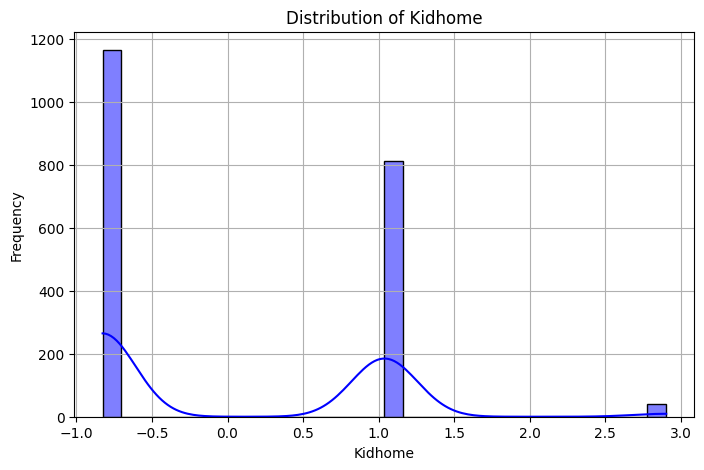

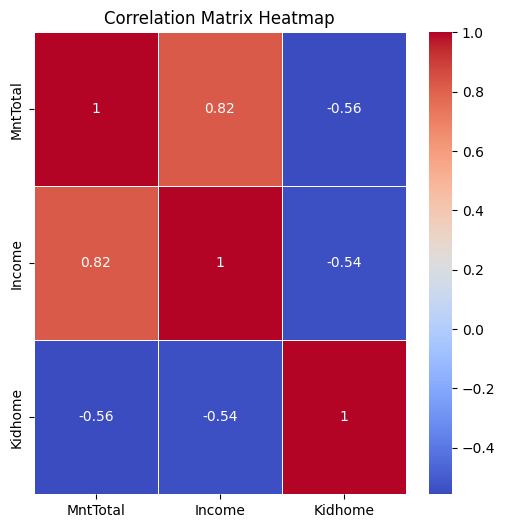

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print(" Summary Statistics:\n")
print(df_cleaned.describe())
print("\n" + "="*50 + "\n")
print(" Unique Value Counts for Categorical Columns:\n")
for col in df_cleaned.select_dtypes(include=['object']).columns:
    print(f"Column: {col}")
    print(df_cleaned[col].value_counts())
    print("-" * 40)
print("\n" + "="*50 + "\n")
plt.figure(figsize=(8,5))
column_to_plot = df_cleaned.columns[1]
sns.histplot(df_cleaned[column_to_plot], bins=30, kde=True, color="blue")
plt.title(f"Distribution of {column_to_plot}")
plt.xlabel(column_to_plot)
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
cols_demographics = ['Income']
cols_children = ['Kidhome']
corr_matrix = df_cleaned[['MntTotal'] + cols_demographics + cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Customer Segmentation**

 Standardized Dataset:

     Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  0.311511 -0.827038 -0.932982  0.315068  0.973297   1.549924   
1 -0.258030  1.038412  0.897655 -0.375927 -0.875480  -0.637837   
2  0.962228 -0.827038 -0.932982 -0.790525  0.354075   0.569203   
3 -1.209260  1.038412 -0.932982 -0.790525 -0.875480  -0.562397   
4  0.318996  1.038412 -0.932982  1.558860 -0.395509   0.418323   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0         1.728456         2.448975          1.461111      0.853147  ...   
1        -0.728158        -0.648771         -0.631988     -0.733988  ...   
2        -0.177695         1.337431         -0.150816     -0.037197  ...   
3        -0.664468        -0.502995         -0.583871     -0.753344  ...   
4        -0.218638         0.152998         -0.006464     -0.559791  ...   

   marital_Together  marital_Widow  education_2n Cycle  education_Basic  \
0         -0.580207      -0.189418           -0

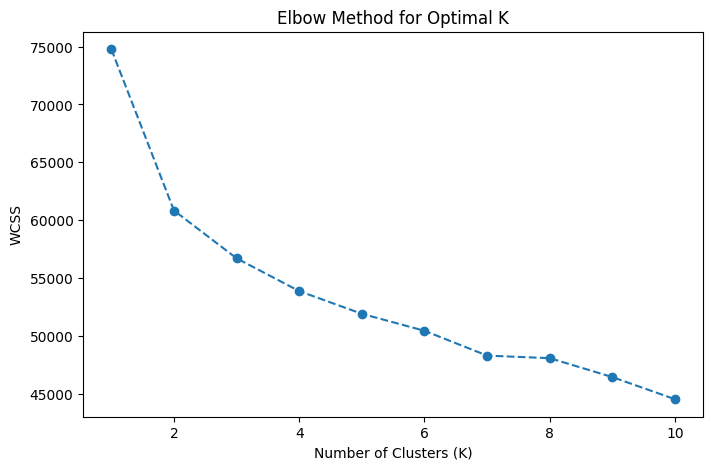

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(" Standardized Dataset:\n")
print(df.head())
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


# **Visualization: Bar Plot & Scatter Plot**

<ipython-input-36-a0d2a8609f5c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


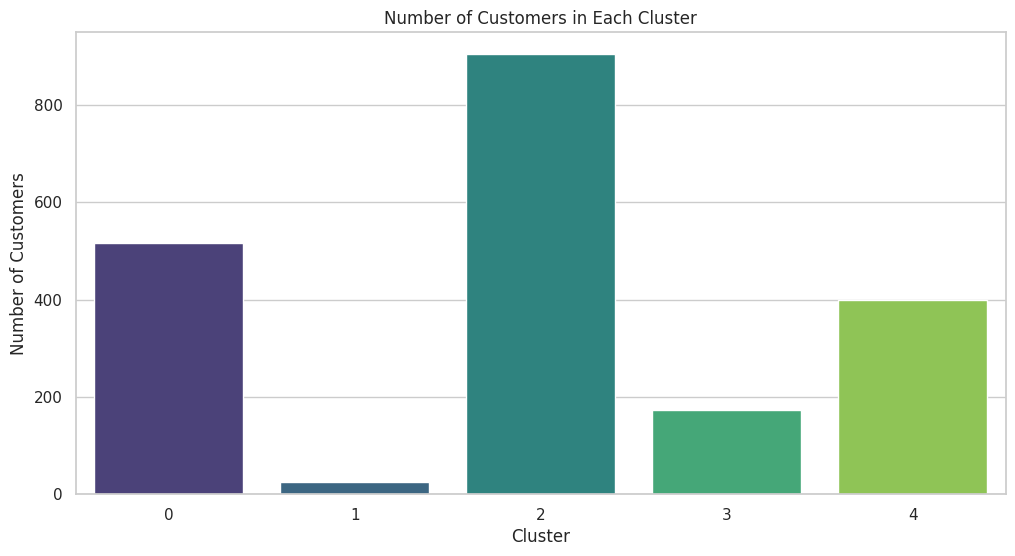

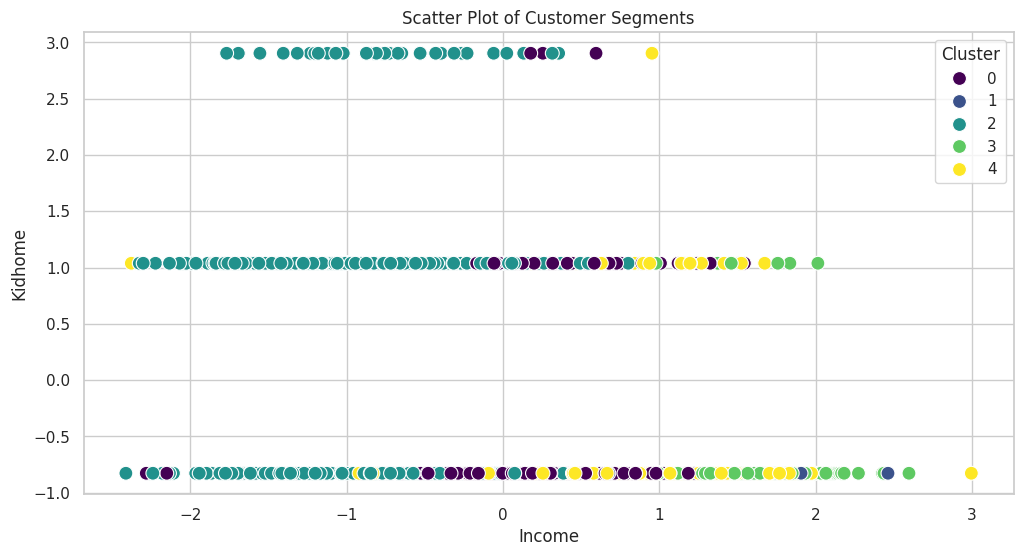

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
cluster_counts = df['Cluster'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x=numerical_cols[0], y=numerical_cols[1], hue='Cluster', palette='viridis', s=100)
plt.title('Scatter Plot of Customer Segments')
plt.xlabel(numerical_cols[0])
plt.ylabel(numerical_cols[1])
plt.legend(title='Cluster')
plt.show()




**Insights and Recommendations**

In [ ]:
def provide_recommendations(cluster_summary):
    recommendations = []
    for cluster in cluster_summary.index:
        cluster_rec = f"Cluster {cluster}:\n"
        if cluster_summary.loc[cluster].mean() > 0.5:
            cluster_rec += "1. Focus on premium product offerings as this segment has a higher spending capacity.\n"
        else:
            cluster_rec += "1. Offer discounts and promotions to attract price-sensitive customers.\n"
        cluster_rec += "2. Tailor marketing campaigns to highlight the most popular products within this segment.\n"
        cluster_rec += "3. Enhance customer experience by providing personalized recommendations based on preferences.\n"
        recommendations.append(cluster_rec)
    return recommendations
recommendations = provide_recommendations(cluster_summary)
for rec in recommendations:
    print(rec)


Cluster 0:
1. Offer discounts and promotions to attract price-sensitive customers.
2. Tailor marketing campaigns to highlight the most popular products within this segment.
3. Enhance customer experience by providing personalized recommendations based on preferences.

Cluster 1:
1. Focus on premium product offerings as this segment has a higher spending capacity.
2. Tailor marketing campaigns to highlight the most popular products within this segment.
3. Enhance customer experience by providing personalized recommendations based on preferences.

Cluster 2:
1. Offer discounts and promotions to attract price-sensitive customers.
2. Tailor marketing campaigns to highlight the most popular products within this segment.
3. Enhance customer experience by providing personalized recommendations based on preferences.

Cluster 3:
1. Offer discounts and promotions to attract price-sensitive customers.
2. Tailor marketing campaigns to highlight the most popular products within this segment.
3. Enh